# Computer Vision
During the first half of this notebook, we'll walk through some basic image loading and pre-processing techniques in Python. Then, we'll plug into Microsoft Azure to play with some of their AI tools.

## Manipulating Images
When a computer looks at an image, it doesn't see shapes and objects. Instead, it sees grids of pixels. AI models are able to process these numerical values to achieve some pretty amazing tasks.

### Loading an Image
We'll start by loading a .JPG image file. Run the following cell of code to load and display the image.

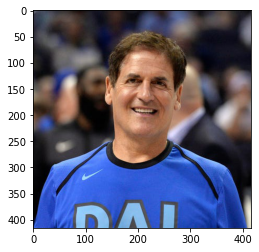

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import numpy as np
%matplotlib inline

img_url = 'https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5d8acdb96de3150009a5060c%2F0x0.jpg%3Fbackground%3D000000%26cropX1%3D1338%26cropX2%3D3471%26cropY1%3D239%26cropY2%3D2372'

# download the image and display it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
plt.imshow(img);

This is what an image looks like to us as humans.

### Examine the Image
Now let's see how the computer sees the image. Run the cell below to convert the image to a **matrix** (a grid of numbers).

In [3]:
img = np.array(img)
img

array([[[ 96,  98, 111],
        [ 97,  99, 112],
        [ 99, 101, 114],
        ...,
        [ 18,  17,  22],
        [ 20,  19,  25],
        [ 21,  20,  26]],

       [[ 96,  98, 111],
        [ 97,  99, 112],
        [ 99, 101, 114],
        ...,
        [ 19,  18,  23],
        [ 22,  21,  27],
        [ 23,  22,  28]],

       [[ 91,  93, 106],
        [ 94,  96, 109],
        [ 97,  99, 112],
        ...,
        [ 22,  21,  26],
        [ 25,  24,  30],
        [ 26,  25,  31]],

       ...,

       [[ 24,  44, 131],
        [ 47,  72, 172],
        [ 64, 100, 212],
        ...,
        [219, 218, 198],
        [222, 221, 201],
        [230, 226, 215]],

       [[ 29,  49, 138],
        [ 59,  84, 185],
        [ 67, 102, 218],
        ...,
        [217, 216, 196],
        [220, 219, 201],
        [231, 226, 220]],

       [[ 35,  54, 146],
        [ 66,  91, 192],
        [ 68, 103, 221],
        ...,
        [215, 214, 196],
        [218, 217, 199],
        [232, 227, 223]]

Now the image is represented as a grid of pixel values. Keep in mind, since there are so many values our code doesn't print them all. As a human, this looks like nothing more than gibberish, however, computers are great at finding patterns in the raw pixels that can be used to detect similar objects. 

Next let's find the pixel dimensions of the image.

In [4]:
(height, width, color_channels) = img.shape
print("height = " + str(height))
print("width = " + str(width))
print("color channels = " + str(color_channels))

height = 416
width = 416
color channels = 3


We can see that the image is 416 pixels tall by 416 pixels wide. We also see that the image has 3 color channels, which is another way for saying we have 3 color values for each pixel: <span style="color: red;">Red</span>, <span style="color: green;">Green</span>, and <span style="color: blue;">Blue</span>.

Let's take a look at a pixel in the image.

In [5]:
pixel_x = 200
pixel_y = 350
pixel_values = img[pixel_y, pixel_x, :]
pixel_values

array([ 52,  92, 214], dtype=uint8)

<p>Here, we can see that the pixel at (200, 350) has a RGB color value of: (51, 92, 216)</p>
<p>Earlier we discussed that in computer vision, every pixel value is a <b>feature</b>. Let's see how many features we have in our image.</p>

In [6]:
num_features = height * width * color_channels
print(str(height) + " x " + str(width) + " x " + str(color_channels) + " = " + str(num_features) + " total features!")

416 x 416 x 3 = 519168 total features!


That is a <b>LOT</b> of features for our model to process! Let's see if we can use some pre-processing techniques to shrink that down a bit.

## Image Pre-Processing
Today we learned that it's sometimes helpful to pre-process images before feeding them to our model. Pre-processing is a way to manipulate an image in a way that makes it easier for a model to learn from.

### Grayscaling
One of the first (and most basic) pre-processing techniques we discussed was grayscaling. By removing color from an image, we significantly reduce the feature size of the image. Let's do this by selecting only the first color channel from out original image.

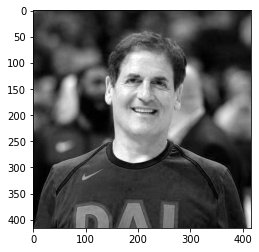

In [7]:
grayscaled = img[:,:,0]
plt.imshow(grayscaled, cmap='gray')

Great! Our image now has 1 color channel instead of 3. Now let's calculate the total number of features again.

In [8]:
num_features = height * width
print(str(height) + " x " + str(width) + " = " + str(num_features) + " total features!")

416 x 416 = 173056 total features!


Nice! We were able to reduce our total feature size by 2/3! Keep in mind, however, that in some problems we will <i>need</i> to keep color information. For instance, if we were building an image classifier to detect dog breeds, it would be very difficult to tell the difference between a brown dog and a black dog from only a grayscale image.

### Normalizing
Another pre-processing technique we talked about is normalization. Machine learning models tend to learn much easier if all of the input data is in the same range (usually 0-1).

We know that pixel values range from 0-255. Let's print out the pixel values and take a look.

In [9]:
img

array([[[ 96,  98, 111],
        [ 97,  99, 112],
        [ 99, 101, 114],
        ...,
        [ 18,  17,  22],
        [ 20,  19,  25],
        [ 21,  20,  26]],

       [[ 96,  98, 111],
        [ 97,  99, 112],
        [ 99, 101, 114],
        ...,
        [ 19,  18,  23],
        [ 22,  21,  27],
        [ 23,  22,  28]],

       [[ 91,  93, 106],
        [ 94,  96, 109],
        [ 97,  99, 112],
        ...,
        [ 22,  21,  26],
        [ 25,  24,  30],
        [ 26,  25,  31]],

       ...,

       [[ 24,  44, 131],
        [ 47,  72, 172],
        [ 64, 100, 212],
        ...,
        [219, 218, 198],
        [222, 221, 201],
        [230, 226, 215]],

       [[ 29,  49, 138],
        [ 59,  84, 185],
        [ 67, 102, 218],
        ...,
        [217, 216, 196],
        [220, 219, 201],
        [231, 226, 220]],

       [[ 35,  54, 146],
        [ 66,  91, 192],
        [ 68, 103, 221],
        ...,
        [215, 214, 196],
        [218, 217, 199],
        [232, 227, 223]]

Yep, each pixel value seems to be in the range of 0-255. In order to normalize these values, we can simply divide every pixel value by 255, which is the maximum.

In [10]:
normalized_img = img / 255.

<p>Let's take a look at the values again to make sure they are in the range of 0-1.</p>

In [11]:
normalized_img

array([[[0.37647059, 0.38431373, 0.43529412],
        [0.38039216, 0.38823529, 0.43921569],
        [0.38823529, 0.39607843, 0.44705882],
        ...,
        [0.07058824, 0.06666667, 0.08627451],
        [0.07843137, 0.0745098 , 0.09803922],
        [0.08235294, 0.07843137, 0.10196078]],

       [[0.37647059, 0.38431373, 0.43529412],
        [0.38039216, 0.38823529, 0.43921569],
        [0.38823529, 0.39607843, 0.44705882],
        ...,
        [0.0745098 , 0.07058824, 0.09019608],
        [0.08627451, 0.08235294, 0.10588235],
        [0.09019608, 0.08627451, 0.10980392]],

       [[0.35686275, 0.36470588, 0.41568627],
        [0.36862745, 0.37647059, 0.42745098],
        [0.38039216, 0.38823529, 0.43921569],
        ...,
        [0.08627451, 0.08235294, 0.10196078],
        [0.09803922, 0.09411765, 0.11764706],
        [0.10196078, 0.09803922, 0.12156863]],

       ...,

       [[0.09411765, 0.17254902, 0.51372549],
        [0.18431373, 0.28235294, 0.6745098 ],
        [0.25098039, 0

Great! Our image is now properly normalized.

### Cropping
The final pre-processing step we discussed is cropping. A lot of times, models can become confused by unimportant background objects. An easy way to combat this is to properly crop only the perintent information in an object. For instance, if we were building a face recognition algorithm, we would want to crop just the face so that we are sure our model doesn't learn anything from the surrounding objects in the image.

Luckily, we can easily crop an image by specifying the coordinates of the desired region. Below we do this by specifying the min/max X values of the cropped image, as well as the min/max Y values.

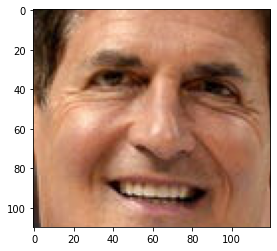

In [12]:
min_x = 150
min_y = 100
max_x = 270
max_y = 210
cropped = img[min_y:max_y, min_x:max_x, :]
plt.imshow(img)
plt.imshow(cropped)

Though we had to manually select the exact coordinates of the crop, we will soon use tools from Microsoft that can automatically detect and crop faces for us.

## Image Augmentation
Sometimes we may want to train an image classifier but find ourselves unable to get our hands on a large image dataset. Luckily, we can use **image augmentation** to generate a bunch of different variations of our data. This provides the model with more training examples with different lighting conditions and orientations. 

Again, we'll load our original colored image.

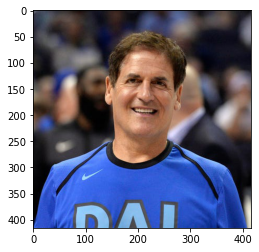

In [13]:
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import requests
from io import BytesIO
import numpy as np
%matplotlib inline

img_url = 'https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5d8acdb96de3150009a5060c%2F0x0.jpg%3Fbackground%3D000000%26cropX1%3D1338%26cropX2%3D3471%26cropY1%3D239%26cropY2%3D2372'

# download the image and display it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
plt.imshow(img);

Let's rotate the image 30 degrees to produce a new image.

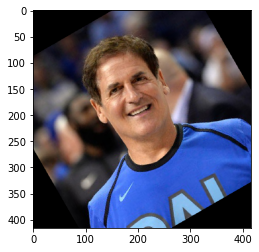

In [14]:
rotated = img.rotate(30)
plt.imshow(rotated);

Next, we'll create a new, brighter image.

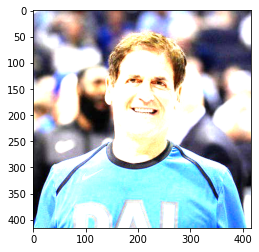

In [15]:
enhancer = ImageEnhance.Brightness(img)
bright = enhancer.enhance(3)
plt.imshow(bright)

Finally, we'll flip the image horizontally.

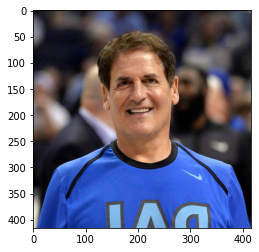

In [16]:
flipped = np.flip(img, 1)
plt.imshow(flipped)
plt.show()

By combining these methods, we can randomly generate a bunch of variations of an image. Let's test this out by generating some examples!

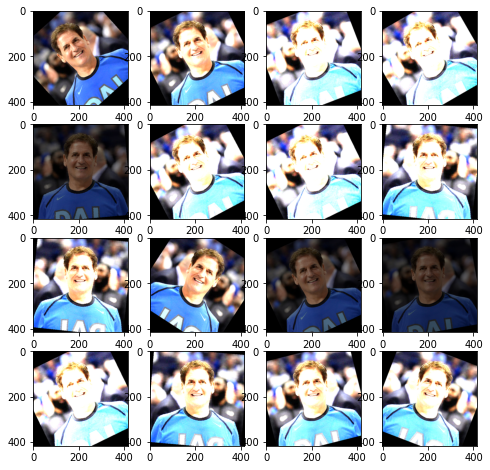

In [17]:
rows = 4
columns = 4
fig = plt.figure(figsize=(8, 8))
for i in range(1, rows*columns + 1):
    orig_img = img.copy()
    shape = np.array(orig_img).shape
    
     # randomly brighten/darken the image
    brightness = np.random.uniform(0.1, 5, size=1)[0]
    enhancer = ImageEnhance.Brightness(orig_img)
    orig_img = enhancer.enhance(brightness)
    
    # randomly rotate the image
    rotation = np.random.randint(45, size=1)[0]
    orig_img = orig_img.rotate(rotation)
    
    # randomly flip the image
    shouldFlip = np.random.randint(2, size=1)[0]
    if shouldFlip:
        orig_img = np.flip(orig_img, 1)
        
    fig.add_subplot(rows, columns, i)
    plt.imshow(orig_img)
plt.show()


We have now seen how we can randomly transform an image to expand our dataset. There are many other transformations we could use to have an even more diverse dataset.

# Microsoft Azure's Cognitive Services


1. Open another browser tab and navigate to https://portal.azure.com.
2. Sign in using your Microsoft account.
3. Click **+ Create a resource**, and search **Computer Vision**.
4. Click on **Computer Vision** and in the **Create** blade, enter the following details, and then click **Review and Create** and then **Create**
  * **Subscription**: Azure for Students or Microsoft Azure Sponsorship
  * **Resource Group**: Choose the existing resource group you created in the previous lab. If you didn't complete the previous lab, click on **Create new**, enter a unique name, and click **Ok** to create a new resource group.)
  * **Region**: You may use: Central US, East US, West US, West US2, West US3, South Central US, West Central US
  * **Name**: A unique name for your service.
  * **Pricing tier**: Choose the F0 pricing tier if on an Azure for Students subscription or the Standard S1 pricing tier if on a Microsoft Azure Sponsorship.
5. Wait for the service to be created and when the deployment is complete, click **Go to resource**.
6. In your resource's blade, click **Keys and Endpoint** and then copy **Key 1** to the clipboard and paste it into the **visionKey** variable assignment value in the cell below. 
7. Run the cell below to assign the variables.

In [43]:
visionKey = '4f1468a0eb724e5b84ac32b334171adb'

### Loading an Image
Let's start with the same image we analyzed previously.

Run the code in the cell below to retrieve the original colored image from the URL:

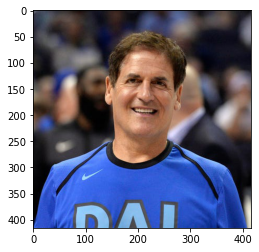

In [44]:
try:
    visionKey
    import matplotlib.pyplot as plt
    from PIL import Image
    import numpy as np
    import requests
    from io import BytesIO
    %matplotlib inline

    img_url = 'https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5d8acdb96de3150009a5060c%2F0x0.jpg%3Fbackground%3D000000%26cropX1%3D1338%26cropX2%3D3471%26cropY1%3D239%26cropY2%3D2372'

    # download the image and display it
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img);
except:
    print("Make sure you run the code cell above that assigns the visionKey variable! Then run this cell again.")

### Use the Computer Vision API to Get Image Features
The Computer Vision API uses a machine learning model that has been pre-trained on millions of images.

Run the cell below to see what caption the Computer Vision API suggests for the image above.

In [45]:
"""
Uncomment, meaning delete the # sign in order to select the region you
set up for your resource! If you do not do this, it will not run!

Exa: If your resource runs in "Central US", you must keep all the other visionURI
with the #, but delete the one with "CentralUS" in the name. Remember, keep the 
other ones with the # sign!

visionURI = 'CentralUS.api.cognitive.microsoft.com'

"""
#visionURI = 'CentralUS.api.cognitive.microsoft.com'
#visionURI = 'EastUS.api.cognitive.microsoft.com'
#visionURI = 'WestUS.api.cognitive.microsoft.com'
#visionURI = 'WestUS2.api.cognitive.microsoft.com'
#visionURI = 'WestUS3.api.cognitive.microsoft.com'
visionURI = 'SouthCentralUS.api.cognitive.microsoft.com'
#visionURI = 'WestCentralUS.api.cognitive.microsoft.com'


def get_image_features(img_url):
    import http.client, urllib.request, urllib.parse, urllib.error, base64, json

    headers = {
        # Request headers.
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': visionKey,
    }

    params = urllib.parse.urlencode({
        # Request parameters. All of them are optional.
        'visualFeatures': 'Categories,Description,Color',
        'language': 'en',
    })

    body = "{'url':'" + img_url + "'}"

    try:
        # Execute the REST API call and get the response.
        conn = http.client.HTTPSConnection(visionURI)
        conn.request("POST", "/vision/v1.0/analyze?%s" % params, body, headers)
        response = conn.getresponse()
        data = response.read()

        # 'data' contains the JSON response.
        parsed = json.loads(data.decode("UTF-8"))
        if response is not None:
            return parsed
        conn.close()


    except Exception as e:
        print('Error:')
        print(e)
        
jsonData = get_image_features(img_url)
desc = jsonData['description']['captions'][0]['text']
print(desc)

Mark Cuban in a blue shirt


The description is pretty spot on. This is not a trick! Azure's model has been trained on many images from the web - including pictures of Mark Cuban.  AI is really that good!

Run the cell below to see the full JSON response, including image properties and suggested tags.

In [46]:
visionURI = 'SouthCentralUS.api.cognitive.microsoft.com'

def get_image_features(img_url):
    import http.client, urllib.request, urllib.parse, urllib.error, base64, json

    headers = {
        # Request headers.
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': visionKey,
    }

    params = urllib.parse.urlencode({
        # Request parameters. All of them are optional.
        'visualFeatures': 'Categories,Description,Color',
        'language': 'en',
    })

    body = "{'url':'" + img_url + "'}"

    try:
        # Execute the REST API call and get the response.
        conn = http.client.HTTPSConnection(visionURI)
        conn.request("POST", "/vision/v1.0/analyze?%s" % params, body, headers)
        response = conn.getresponse()
        data = response.read()

        # 'data' contains the JSON response.
        parsed = json.loads(data.decode("UTF-8"))
        if response is not None:
            return parsed
        conn.close()


    except Exception as e:
        print('Error:')
        print(e)
        
jsonData = get_image_features(img_url)
desc = jsonData['description']['captions'][0]['text']
print(desc)

Mark Cuban in a blue shirt


In [47]:
import json

# View the full details returned
print (json.dumps(jsonData, sort_keys=True, indent=2))

{
  "categories": [
    {
      "detail": {
        "celebrities": [
          {
            "confidence": 0.99843829870224,
            "faceRectangle": {
              "height": 117,
              "left": 155,
              "top": 103,
              "width": 117
            },
            "name": "Mark Cuban"
          }
        ]
      },
      "name": "people_",
      "score": 0.3828125
    },
    {
      "detail": {
        "celebrities": [
          {
            "confidence": 0.99843829870224,
            "faceRectangle": {
              "height": 117,
              "left": 155,
              "top": 103,
              "width": 117
            },
            "name": "Mark Cuban"
          }
        ]
      },
      "name": "people_group",
      "score": 0.3203125
    }
  ],
  "color": {
    "accentColor": "1769B4",
    "dominantColorBackground": "Blue",
    "dominantColorForeground": "Blue",
    "dominantColors": [
      "Blue",
      "Black",
      "Brown"
    ],
    "isBWImg": 

Let's try with a different image:

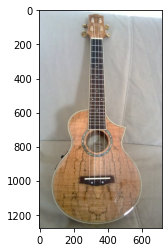

a close up of a guitar


In [48]:
# Get the image and show it
img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/uke.jpg'

# download the image and display it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.show()
jsonData = get_image_features(img_url)
desc = jsonData['description']['captions'][0]['text']
print(desc)

How about something a little more complex?

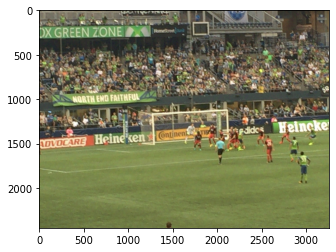

a crowd of people watching a football game


In [49]:
# Get the image and show it
img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/soccer.jpg'

# download the image and display it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.show()
jsonData = get_image_features(img_url)
desc = jsonData['description']['captions'][0]['text']
print(desc)

## Using the Face API
While the Computer Vision API is useful for general image analysis, the Face API offers specific functions for analyzing faces in images. This can be useful in a variety of AI scenarios.

### Create a Face API Service
To provision a Computer Vision API service in your Azure subscription, Follow these steps:

1. Open another browser tab and navigate to https://portal.azure.com.
2. Sign in using your Microsoft account.
3. Click **+ Create a Resource**, and search **Face**.
4. Click **Face** and in the **Create** blade, enter the following details, and then click **Review and Create** and then **Create**
  * **Subscription**: Azure for Students or Microsoft Azure Sponsorship
  * **Resource Group**: Choose the existing resource group you created earlier.
  * **Region**: You must use the same region as previously selected: Central US, East US, West US, West US2, West US3, South Central US, West Central US
  * **Name**: A unique name for your service.
  * **Pricing tier**: Choose the F0 pricing tier if on an Azure for Students subscription or the S0 pricing tier if on a Microsoft Azure Sponsorship.
  
  Also, be sure to check the box verifying this service is not being used by or for a police department in the US.
5. Wait for the service to be created.
6. When deployment is complete, click **Go to Resource**.
7. In your resource's blade, click **Keys and Endpoint** and then copy **Key 1** to the clipboard and paste it into the **faceKey** variable assignment value in the cell below.
8. In your resource's blade, click **Keys and Endpoint** and then copy **Endpoint** to the clipboard and paste it into the **faceEndpoint** variable assignment value in the cell below.
8. Run the cell below to assign the variables.

In [51]:
# This key will serve all examples in this document.
faceKey = "5e9378474f214dd3ae435d6d3acd0db6"

# This endpoint will be used in all examples in this quickstart.
faceEndpoint = "https://yabesrae.cognitiveservices.azure.com/"

The Face API has a Python SDK, which you can install as a package. This makes it easier to work with.

Run the following cell to install the Face SDK.

In [52]:
!pip install --upgrade azure-cognitiveservices-vision-face

     |████████████████████████████████| 66 kB 3.0 MB/s eta 0:00:011


After installing, run a slew of `import`'s per [instructions from Microsoft](https://docs.microsoft.com/en-us/azure/cognitive-services/Face/Quickstarts/client-libraries?pivots=programming-language-python&tabs=visual-studio)

In [53]:
import asyncio
import io
import glob
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO
# To install this module, run:
# python -m pip install Pillow
from PIL import Image, ImageDraw
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person

Finally, you will need to authenticate to the Cognitive Service Face API.

In [54]:
# Create an authenticated FaceClient.
face_client = FaceClient(faceEndpoint, CognitiveServicesCredentials(faceKey))

Now you're ready to use the Face API. First, let's see if we can detect a face in an image:

In [55]:
# Detect a face in an image that contains a single face
img_url = 'https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5d8acdb96de3150009a5060c%2F0x0.jpg%3Fbackground%3D000000%26cropX1%3D1338%26cropX2%3D3471%26cropY1%3D239%26cropY2%3D2372'
img_name = 'Forbes image'

# We use detection model 3 to get better performance.
detected_faces = face_client.face.detect_with_url(url=img_url, detection_model='detection_03')
if not detected_faces:
    raise Exception('No face detected from image {}'.format(img_name))

# Display the detected face IDs in the first single-face image.
# Face IDs are used for comparison to faces (their IDs) detected in other images.
print('Detected face ID(s) from', img_name, ':')
for face in detected_faces: print (face.face_id)
print()

# Save this ID for use in Find Similar
first_image_face_ID = detected_faces[0].face_id

Detected face ID(s) from Forbes image :
8edb94dd-2cd9-44fa-ad69-1868f26f80ad
f6279c08-afe2-4391-9e3a-6c9cf6163e89



The Face API has assigned the each face to an ID. It also returns the coordinates for the top left corner and the width and height for the rectangle within which the face is detected. Our focus will be on the first ID returned.

Run the cell below to show the rectangle on the image.

Drawing rectangle around face....


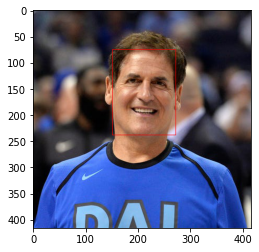

In [56]:
# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

def drawFaceRectangles() :
# Download the image from the url
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))

# For each face returned use the face rectangle and draw a red box.
    print('Drawing rectangle around face....')
    draw = ImageDraw.Draw(img)
    draw.rectangle(getRectangle(detected_faces[0]), outline='red')

# Display the image.
    plt.imshow(img)
    plt.show()  

# Show the face rectangles.
drawFaceRectangles()

In addition to detecting the face, the Face API also assigned an ID to this face. The ID is saved by the service for a while, enabling you to reference it. Run the following cell to see the ID assigned to the face that has been detected:

In [57]:
face1 = detected_faces[0].face_id
print ("Face 1:" + face1)

Face 1:8edb94dd-2cd9-44fa-ad69-1868f26f80ad


One useful thing you can do with the face ID is to compare images and see if a matching face is found. This kind of facial comparison is common in a variety of security / user authentication scenarios.

Let's try it with another image of the same person:

Face 2:6b36f39d-0c6c-4753-9701-a2746402b960
Verified
Confidence Level: 0.71443


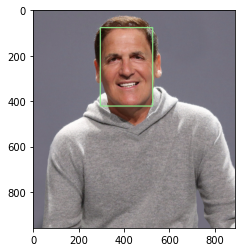

In [58]:
# Get the image to compare
img2_url = 'https://markcubancompanies.com/wp-content/uploads/2020/05/Cuban-1-e1589823008367.jpeg'
response2 = requests.get(img2_url)
img2 = Image.open(BytesIO(response2.content))
img2_name = 'Mark Cuban Companies image'

# Detect faces in a comparison image
detected_faces2 = face_client.face.detect_with_url(url=img2_url, detection_model='detection_03')
if not detected_faces2:
    raise Exception('No face detected from image {}'.format(img2_name))

# Assume the first face is the one we want to compare
if detected_faces2 is not None:
    face2 = detected_faces2[0].face_id
    print ("Face 2:" + face2)

# compare the comparison face to the original one we retrieved previously
def verify_face(face1, face2):
    # By default, assume the match is unverified
    verified = "Not Verified"
    color="red"

    # compare the comparison face to the original one we retrieved previously
    verify = face_client.face.verify_face_to_face(face1, face2)

    # if there's a match, set verified and change color to green
    if verify.is_identical == True:
        verified = "Verified"
        color="lightgreen"

    # Display the second face with a red rectange if unverified, or green if verified
    draw = ImageDraw.Draw(img2) 
    for currFace in detected_faces2:
        rect = currFace.face_rectangle
        left = rect.left
        top = rect.top
        width = rect.width
        height = rect.height

        draw.line([(left,top),(left+width,top)] , fill=color, width=5)
        draw.line([(left+width,top),(left+width,top+height)] , fill=color, width=5)
        draw.line([(left+width,top+height),(left, top+height)] , fill=color, width=5)
        draw.line([(left,top+height),(left, top)] , fill=color, width=5)

    # show the image
    plt.imshow(img2)

    # Display verification status and confidence level
    print(verified)
    print ("Confidence Level: " + str(verify.confidence))

verify_face(face1, face2)

What if we try to match the original face to a different person?

Face 2:6c7a09eb-c742-43f4-87cb-d042b6b0e015
Not Verified
Confidence Level: 0.13176


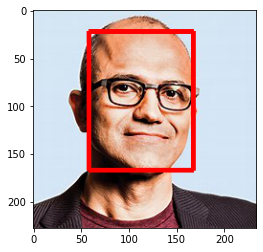

In [59]:
# Get the image to compare
img2_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/satya.jpg'
response2 = requests.get(img2_url)
img2 = Image.open(BytesIO(response2.content))
img2_name = 'Microsoft Learning image'

# Detect faces in a comparison image
detected_faces2 = face_client.face.detect_with_url(url=img2_url, detection_model='detection_03')
if not detected_faces2:
    raise Exception('No face detected from image {}'.format(img2_name))

# Assume the first face is the one we want to compare
if detected_faces2 is not None:
    face2 = detected_faces2[0].face_id
    print ("Face 2:" + face2)

verify_face(face1, face2)


No match!

## Using the Custom Vision Cognitive Service
The *Custom Vision* cognitive service enables you to create custom computer vision solutions.

In this notebook, you will create and train a Custom Vision *image classification* project that can identify pictures of apples and carrots, and use it to classify new images.

&gt; **Note**: *Some of the images used in the lab are sourced from the free image library at <a>www.pachd.com</a>*


Let's download and extract the images you will use to train your classifier.

In [60]:
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/produce.zip -o produce.zip
!unzip produce.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26.3M  100 26.3M    0     0  40.6M      0 --:--:-- --:--:-- --:--:-- 40.5M
Archive:  produce.zip
  inflating: apples/Apple1.jpg       
  inflating: apples/Apple10.jpg      
  inflating: apples/Apple2.jpg       
  inflating: apples/Apple3.jpg       
  inflating: apples/Apple4 (2).jpg   
  inflating: apples/Apple4.jpg       
  inflating: apples/Apple5.jpg       
  inflating: apples/Apple6.jpg       
  inflating: apples/Apple7.jpg       
  inflating: apples/Apple8.jpg       
  inflating: apples/Apple9.jpg       
  inflating: carrots/Carrot1.JPG     
  inflating: carrots/Carrot2.JPG     
  inflating: carrots/Carrot3.JPG     
  inflating: carrots/Carrot4.JPG     
  inflating: carrots/Carrot5.JPG     
  inflating: carrots/Carrot6.JPG     
  inflating: carrots/Carrot7.JPG     
  inflating: carrots/Carrot8.JPG     
  inflating: carrot

### Create a Custom Vision service instance
Now you're ready to use the Custom Vision service. You'll need to create an instance of the service and get your unique training and prediction keys so you can access it:
1. Go to https://customvision.ai/ and sign in using the Microsoft account associated with your Azure subscription.
2. Click the *Settings* (⚙) icon at the top right and click **create new** to create a new resource.
3. Enter the following information and click **Create resource**:
  * **Name**: A unique name for your service.
  * **Subscription**: Azure for Students or Microsoft Azure Sponsorship
  * **Resource Group**: Choose the existing resource group you created earlier.
  * **Kind**: CognitiveServices
  * **Location**: You may use: Central US, East US, West US, West US2, West US3, South Central US, West Central US. When running in Binder, it does not have to be the same as the locations for Face API and Computer Vision API that you just used.
  * **Pricing tier**: Choose the F0 or S0 pricing tier.
4. Wait for the resource to be created.
5. Copy *Key* to **customVisionKey**, *Endpoint* to **endpoint**, and *Resource Id* to **resourceID** in variables below and **run the cell**:

In [61]:
customVisionKey = '3113ba09ba6d4a95afc6b4ee8c0b3d93'
endpoint = 'https://southcentralus.api.cognitive.microsoft.com/'
resourceID = '/subscriptions/55dab59d-46ff-4de0-8cc4-a5edaac8cb86/resourceGroups/Chinemera/providers/Microsoft.CognitiveServices/accounts/Yabesra'

### Create a Custom Vision project
Now we'll create a project for the apple/carrot classifier:

In [62]:
try:
    customVisionKey
    endpoint
    resourceID
    
    from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient

    trainer = CustomVisionTrainingClient(customVisionKey, endpoint=endpoint)

    # Create a new project
    print ("Creating project...")
    project = trainer.create_project("Produce Classification")
    print("The project was created!")
except:
    print("Make sure you run the code cell above that assigns the customVisionKey, endpoint, and resourceID variables! Then run this cell again.")

Creating project...
The project was created!


### Add tags
The project will identify images as apples or carrots, so we'll need tags for those classes:

In [63]:
# Make two tags in the new project
print("Creating tags...")
apple_tag = trainer.create_tag(project.id, "Apple")
carrot_tag = trainer.create_tag(project.id, "Carrot")
print('Created tags!')

Creating tags...
Created tags!


### Upload training images
Now that we've got the tags, we need to upload some images of apples and carrots, assign the appropriate tags:

In [64]:
import os

print("Adding images...")

apples_dir = "apples"
for image in os.listdir(apples_dir):
    with open(os.path.join(apples_dir, image), mode="rb") as img_data: 
        trainer.create_images_from_data(project.id, img_data.read(), [apple_tag.id])

carrots_dir = "carrots"
for image in os.listdir(carrots_dir):
    with open(os.path.join(carrots_dir, image), mode="rb") as img_data: 
        trainer.create_images_from_data(project.id, img_data.read(), [carrot_tag.id])
        
print('Added images!')

Adding images...
Added images!


Return to your Custom Vision service and click the *Home* (⌂) icon to return to the home page, and then open the ***Produce Classification*** project to view the images that have been uploaded and tagged.

### Train the project
With the tagged images in place, we're now ready to train a classification model:

In [65]:
import time

print ("Training...")
# Train the project, checking status every 1 second
iteration = trainer.train_project(project.id)
while (iteration.status == "Training"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)

# The iteration is now trained. Publish it to the project endpoint
trainer.publish_iteration(project.id, iteration.id, "First Iteration", resourceID)

# Make it the default iteration
iteration = trainer.update_iteration(project_id= project.id, iteration_id=iteration.id, name= "First Iteration", is_default=True)

print ("Trained!")

Training...
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training


### Use the project to classify images
Now that we have a trained project, we can use it to predict the class of new images that weren't in the training dataset:

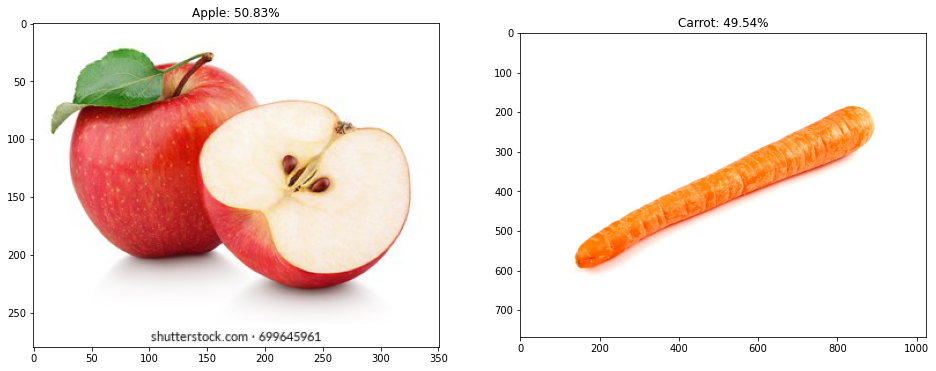

In [67]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
%matplotlib inline

# Use two test images
test_img1_url = 'https://image.shutterstock.com/image-photo/ripe-red-apple-fruit-half-260nw-699645961.jpg'
#test_img1_url = 'http://www.pachd.com/free-images/food-images/apple-01.jpg'
test_img2_url = 'http://www.pachd.com/free-images/food-images/carrot-02.jpg'

test_image_urls = []
test_image_urls.append(test_img1_url)
test_image_urls.append(test_img2_url)

# Create an instance of the prediction service
predictor = CustomVisionPredictionClient(customVisionKey, endpoint=endpoint)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Get the images and show the predicted classes
for url_idx in range(len(test_image_urls)):
    response = requests.get(test_image_urls[url_idx])
    image_contents = Image.open(BytesIO(response.content))
    results = predictor.classify_image_url(project_id=project.id, published_name=iteration.name, url=test_image_urls[url_idx])
    # The results include a prediction for each tag, in descending order of probability - so we'll get the first one
    prediction = results.predictions[0].tag_name + ": {0:.2f}%".format(results.predictions[0].probability * 100)
    # Subplot for image and its predicted class
    a=fig.add_subplot(1,2,url_idx+1)
    imgplot = plt.imshow(image_contents)
    a.set_title(prediction)

plt.show()

Want to go a step further? Try testing your model on new images from Google! To do this, replace **test_img1_url** and **test_img2_url** in the code above with the URLs of the images you would like to test. Then re-run the code cell.

# Nice job!
You have now learned how to use Microsoft Azure's computer vision tools to process images. In the next lab, you'll see how you can create a Custom Vision image classifier to recognize traffic signs.